# Hypotheses 1 and 3

Use [a)](https://daviddalpiaz.github.io/appliedstats/model-diagnostics.html#influence), [b)](https://daviddalpiaz.github.io/appliedstats/transformations.html), and [c)](https://ademos.people.uic.edu/Chapter18.html) as a reference.


The presence of credibility indicators in the system will:

- $H_1$: decrease the affirmation rate for rumours with lower evidence levels.
- $H_3$: increase the affirmation rate for rumours with higher evidence levels.

In [ ]:
library(lme4)
library(e1071) 
library(parameters) 
options(scipen = 100)

data <- read.csv("../../data/processed/60b37265a9f60881975de69e-reshare_rates.csv")
data$condition = as.factor(data$condition)
data$evidence = as.factor(data$evidence)
data$educationLevel = as.factor(data$educationLevel)
data$politicalAffiliation = as.factor(data$politicalAffiliation)
data$attendsProtests = as.factor(data$attendsProtests)
head(data)

In [2]:
levels(data$condition)
levels(data$evidence)

[1] "Control"   "Treatment"

[1] "High" "Low"

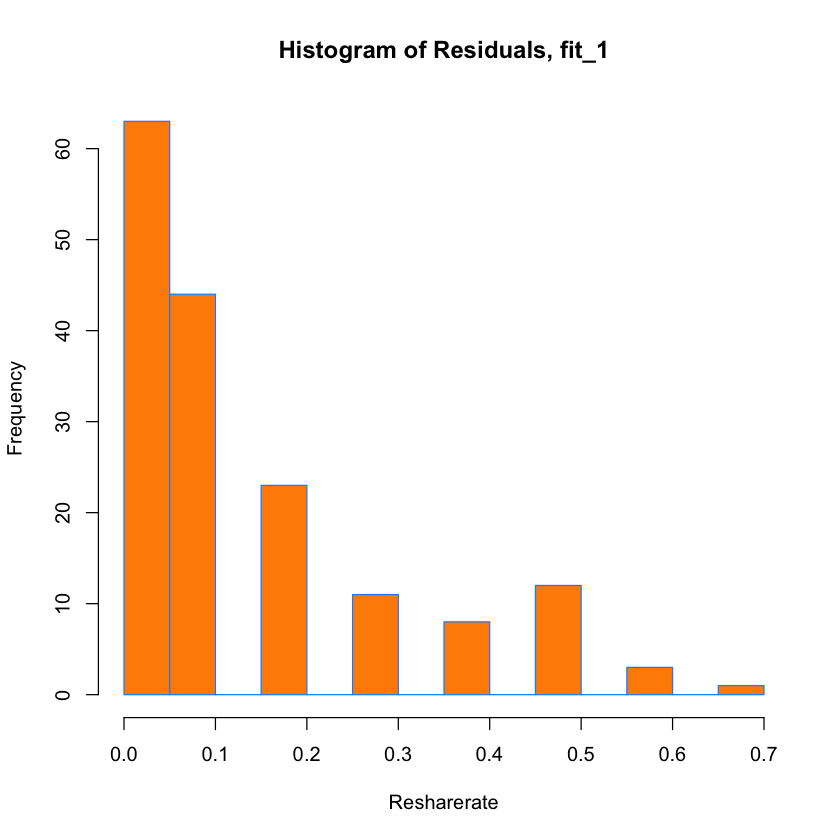

In [3]:
hist(data$Affirms,
     xlab   = "Resharerate",
     main   = "Histogram of Residuals, fit_1",
     col    = "darkorange",
     border = "dodgerblue",
     breaks = 20)

## Baseline model

Are people less likely to reshare the low evidence rumour?

In [4]:
md.affirms = lmer(Affirms ~ evidence + (1 |user_id), data = data)
p_value_satterthwaite(md.affirms)
summary(md.affirms)

Parameter,p
<chr>,<dbl>
(Intercept),0.0000000000000004574437
evidenceLow,0.0083450505043616337447


Linear mixed model fit by REML ['lmerMod']
Formula: Affirms ~ evidence + (1 | user_id)
   Data: data

REML criterion at convergence: -134.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.8030 -0.5065 -0.1770  0.3597  2.2993 

Random effects:
 Groups   Name        Variance Std.Dev.
 user_id  (Intercept) 0.01485  0.1218  
 Residual             0.01333  0.1154  
Number of obs: 165, groups:  user_id, 89

Fixed effects:
            Estimate Std. Error t value
(Intercept)  0.17094    0.01859   9.196
evidenceLow -0.04966    0.01837  -2.703

Correlation of Fixed Effects:
            (Intr)
evidenceLow -0.525

## Interaction model

What is the marginal effect of the treatment?

In [5]:
md.affirms = lmer(Affirms ~ evidence * condition + (1 |user_id), data = data)
p_value_satterthwaite(md.affirms)
summary(md.affirms)

Parameter,p
<chr>,<dbl>
(Intercept),0.0000000001586717
evidenceLow,0.1358717639843075
conditionTreatment,0.9849475184200061
evidenceLow:conditionTreatment,0.4074458208258201


Linear mixed model fit by REML ['lmerMod']
Formula: Affirms ~ evidence * condition + (1 | user_id)
   Data: data

REML criterion at convergence: -126

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.7658 -0.5485 -0.1249  0.3175  2.2637 

Random effects:
 Groups   Name        Variance Std.Dev.
 user_id  (Intercept) 0.01509  0.1228  
 Residual             0.01334  0.1155  
Number of obs: 165, groups:  user_id, 89

Fixed effects:
                                 Estimate Std. Error t value
(Intercept)                     0.1714133  0.0247775   6.918
evidenceLow                    -0.0365357  0.0242513  -1.507
conditionTreatment             -0.0007122  0.0376823  -0.019
evidenceLow:conditionTreatment -0.0309557  0.0371741  -0.833

Correlation of Fixed Effects:
            (Intr) evdncL cndtnT
evidenceLow -0.520              
cndtnTrtmnt -0.658  0.342       
evdncLw:cnT  0.339 -0.652 -0.524

Often, the assumptions of linear regression, are stated as,

- **Linearity**: the response can be written as a linear combination of the predictors. (With noise about this true linear relationship.)
- **Independence**: the errors are independent.
- **Normality**: the distribution of the errors should follow a normal distribution.
- **Equal Variance**: the error variance is the same at any set of predictor values.

The linearity assumption is encoded as

$\beta_0+\beta_1x_{i1}+\beta_2x_{i2}+...+\beta_{p−1}x_{i(p−1)}$,

while the remaining three, are all encoded in

$\epsilon_i~N(0,\sigma^2)$,

since the $\epsilon_i$ are iid normal random variables with constant variance.

If these assumptions are met, great! We can perform inference, and it is valid. If these assumptions are not met, we can still “perform” a t
-test using R, but the results are not valid. The distributions of the parameter estimates will not be what we expect. Hypothesis tests will then accept or reject incorrectly. Essentially, garbage in, garbage out.


## linearity and constant variance 

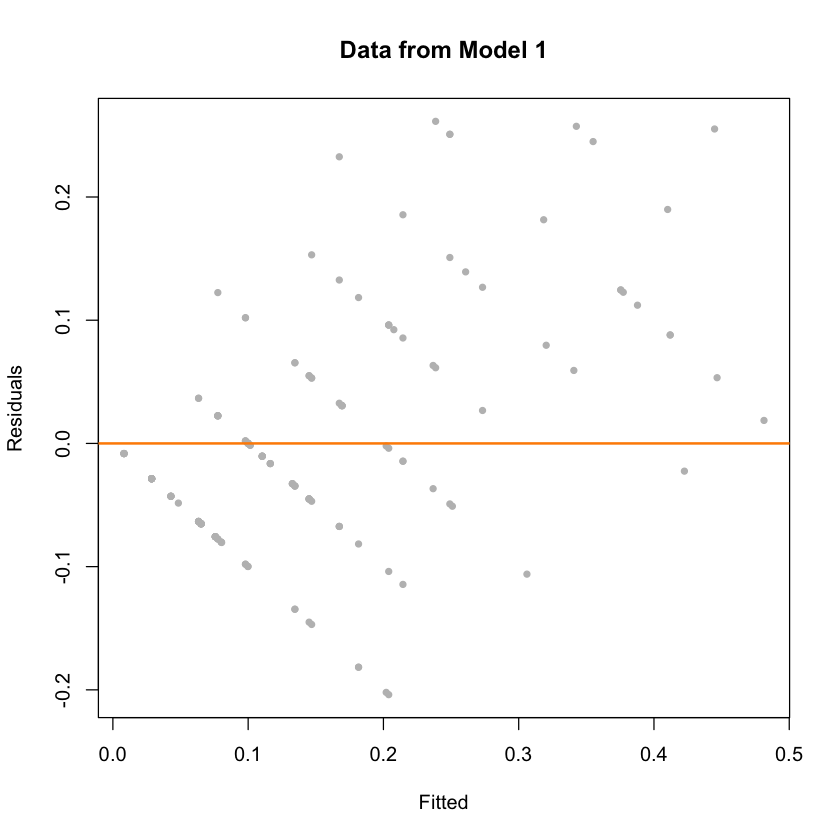

In [6]:
plot(fitted(md.affirms), resid(md.affirms), col = "grey", pch = 20,
     xlab = "Fitted", ylab = "Residuals", main = "Data from Model 1")
abline(h = 0, col = "darkorange", lwd = 2)

In [7]:
mean(resid(md.affirms))

[1] -0.00000000000000004377651

## Normality

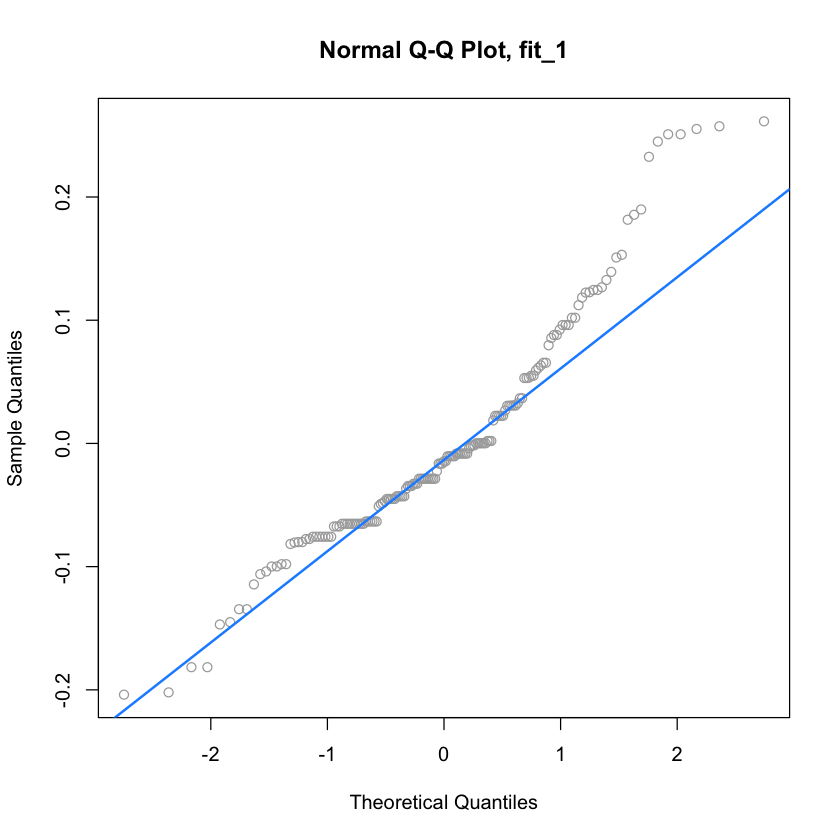

In [8]:
qqnorm(resid(md.affirms), main = "Normal Q-Q Plot, fit_1", col = "darkgrey")
qqline(resid(md.affirms), col = "dodgerblue", lwd = 2)

In [9]:
shapiro.test(resid(md.affirms))


	Shapiro-Wilk normality test

data:  resid(md.affirms)
W = 0.93818, p-value = 0.00000142


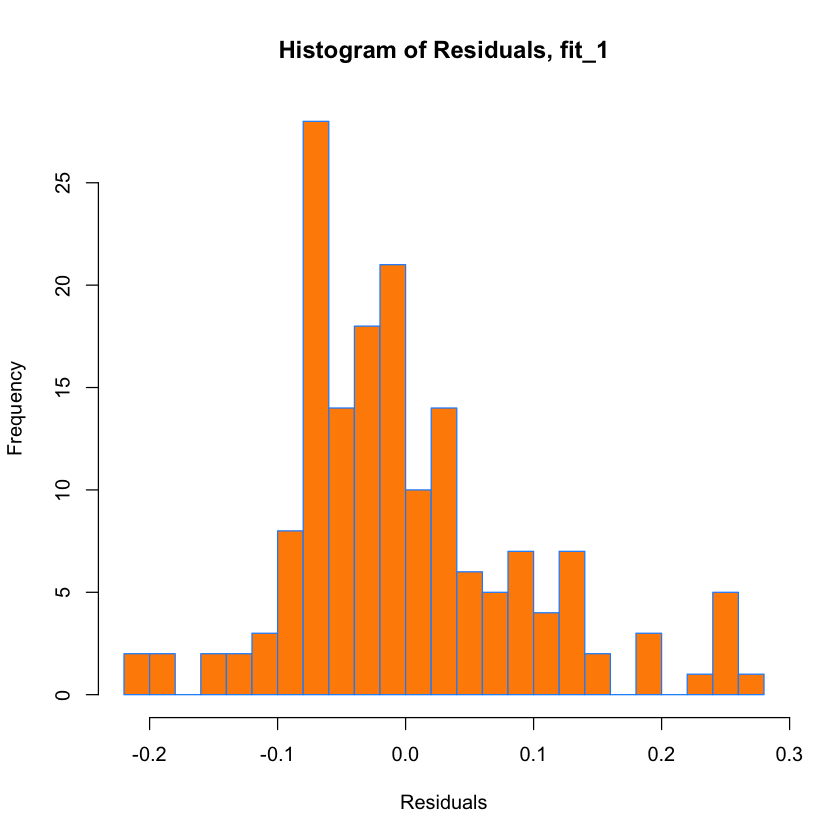

In [10]:
hist(resid(md.affirms),
     xlab   = "Residuals",
     main   = "Histogram of Residuals, fit_1",
     col    = "darkorange",
     border = "dodgerblue",
     breaks = 20)

#### Normality assumption is broekn so transform response var

In [11]:
skewness(data$Affirms)$Skewness
skewness(sqrt(data$Affirms))$Skewness

[1] 1.224616

[1] 0.2300655

In [12]:
md.affirms = lmer(sqrt(Affirms) ~ evidence * condition + (1 |user_id), data = data)
p_value_satterthwaite(md.affirms)
summary(md.affirms)

Parameter,p
<chr>,<dbl>
(Intercept),0.00000000000001507289
evidenceLow,0.18377572373239328685
conditionTreatment,0.83392712291849613315
evidenceLow:conditionTreatment,0.26515471490717185121


Linear mixed model fit by REML ['lmerMod']
Formula: sqrt(Affirms) ~ evidence * condition + (1 | user_id)
   Data: data

REML criterion at convergence: 11.2

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.82944 -0.70613 -0.01121  0.52571  1.90735 

Random effects:
 Groups   Name        Variance Std.Dev.
 user_id  (Intercept) 0.03112  0.1764  
 Residual             0.03350  0.1830  
Number of obs: 165, groups:  user_id, 89

Fixed effects:
                               Estimate Std. Error t value
(Intercept)                     0.32158    0.03745   8.586
evidenceLow                    -0.05146    0.03838  -1.341
conditionTreatment              0.01197    0.05698   0.210
evidenceLow:conditionTreatment -0.06597    0.05879  -1.122

Correlation of Fixed Effects:
            (Intr) evdncL cndtnT
evidenceLow -0.544              
cndtnTrtmnt -0.657  0.357       
evdncLw:cnT  0.355 -0.653 -0.547

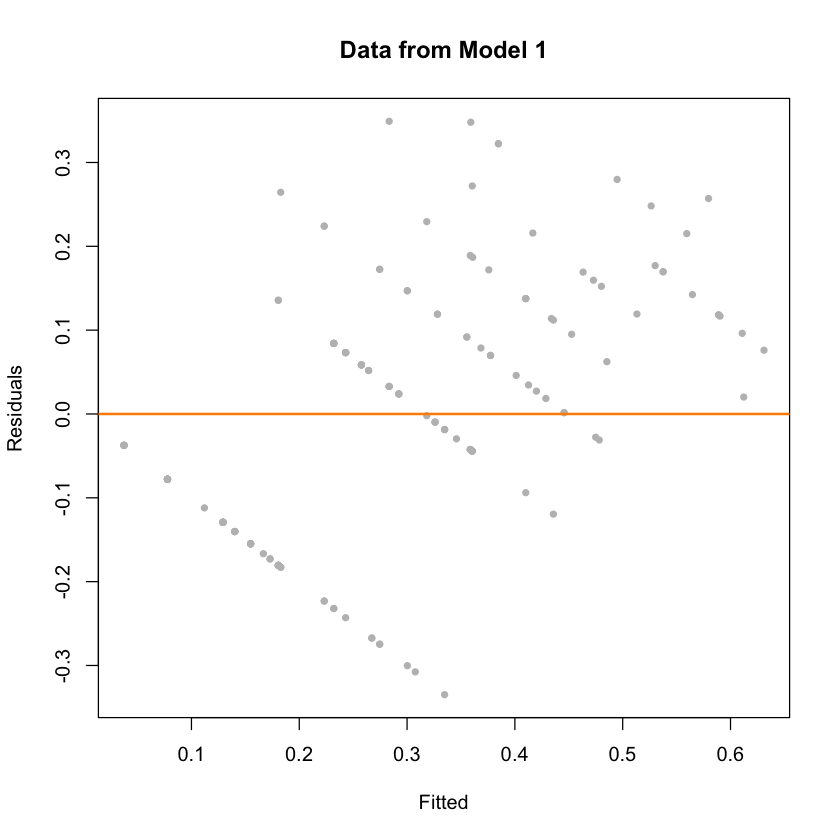

In [13]:
plot(fitted(md.affirms), resid(md.affirms), col = "grey", pch = 20,
     xlab = "Fitted", ylab = "Residuals", main = "Data from Model 1")
abline(h = 0, col = "darkorange", lwd = 2)

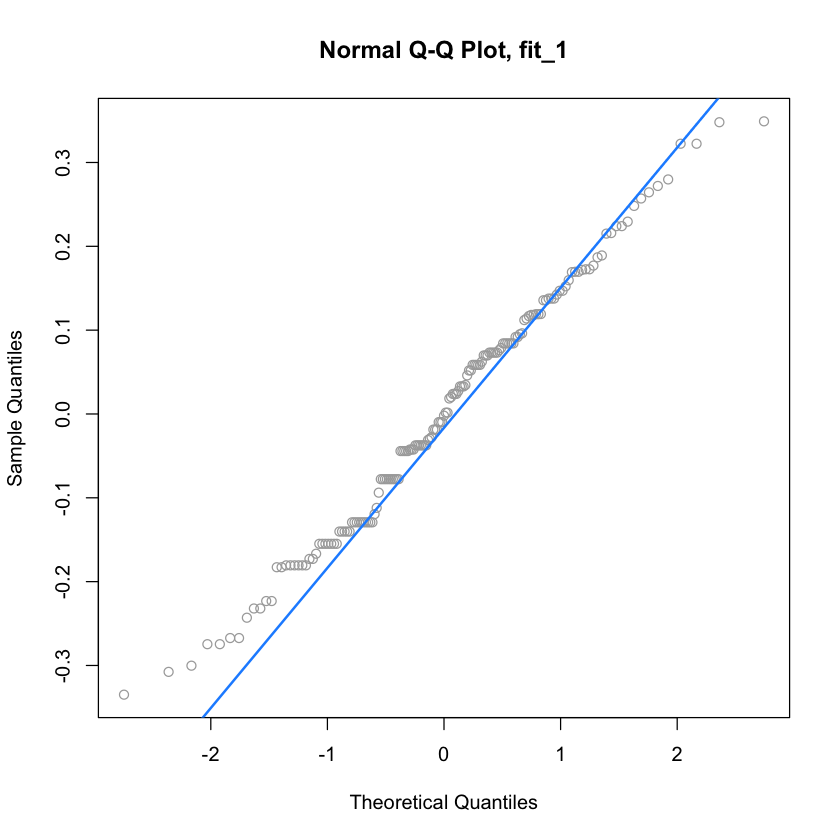

In [14]:
qqnorm(resid(md.affirms), main = "Normal Q-Q Plot, fit_1", col = "darkgrey")
qqline(resid(md.affirms), col = "dodgerblue", lwd = 2)

In [15]:
shapiro.test(resid(md.affirms))


	Shapiro-Wilk normality test

data:  resid(md.affirms)
W = 0.98841, p-value = 0.1925


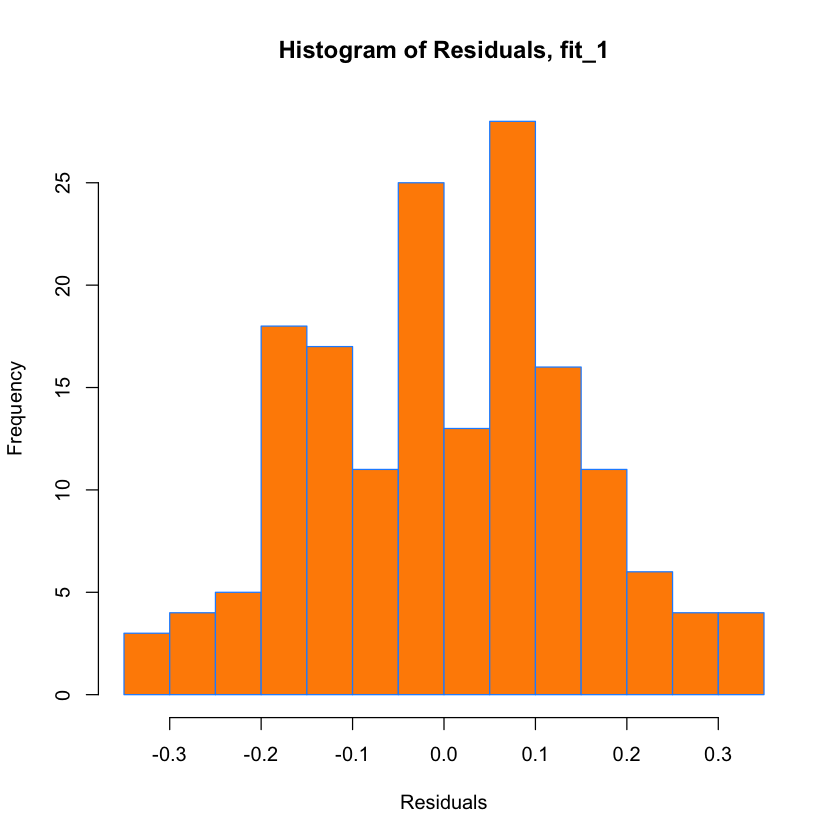

In [16]:
hist(resid(md.affirms),
     xlab   = "Residuals",
     main   = "Histogram of Residuals, fit_1",
     col    = "darkorange",
     border = "dodgerblue",
     breaks = 20)

### SEE HOW ESTIMATES CHANGE WHEN REMOVE INFLUENTIAL POINTS

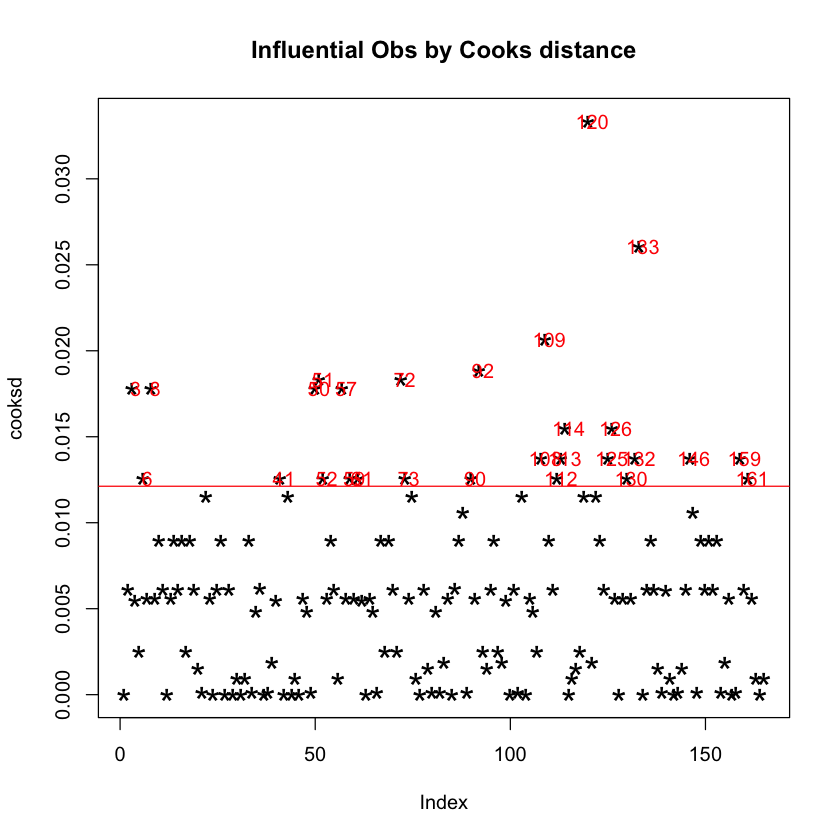

In [71]:
mod <- lm(sqrt(Affirms) ~ evidence * condition + (1 |user_id),data=data)
cooksd <- cooks.distance(mod)
thresh <- 2
# Plot the Cook's Distance using the traditional 4/n criterion
sample_size <- nrow(data)
plot(cooksd, pch="*", cex=2, main="Influential Obs by Cooks distance")  # plot cook's distance
abline(h = thresh/sample_size, col="red")  # add cutoff line
text(x=1:length(cooksd)+1, y=cooksd, labels=ifelse(cooksd>thresh/sample_size, names(cooksd),""), col="red")  # add label

In [72]:
md.affirms = lmer(sqrt(Affirms) ~ evidence * condition + (1 |user_id),
                  data=data,
                  subset = cooksd<=(thresh/sample_size)
                 )
p_value_satterthwaite(md.affirms)
summary(md.affirms)

Parameter,p
<chr>,<dbl>
(Intercept),0.000000000005717938
evidenceLow,0.574528609608266794
conditionTreatment,0.009579794624377391
evidenceLow:conditionTreatment,0.004345802000349125


Linear mixed model fit by REML ['lmerMod']
Formula: sqrt(Affirms) ~ evidence * condition + (1 | user_id)
   Data: data
 Subset: cooksd <= (thresh/sample_size)

REML criterion at convergence: -34.4

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.63770 -0.76968  0.01463  0.68497  2.12938 

Random effects:
 Groups   Name        Variance Std.Dev.
 user_id  (Intercept) 0.01194  0.1093  
 Residual             0.03018  0.1737  
Number of obs: 137, groups:  user_id, 81

Fixed effects:
                               Estimate Std. Error t value
(Intercept)                     0.25069    0.03306   7.583
evidenceLow                    -0.02194    0.03886  -0.564
conditionTreatment              0.14702    0.05593   2.629
evidenceLow:conditionTreatment -0.18917    0.06413  -2.950

Correlation of Fixed Effects:
            (Intr) evdncL cndtnT
evidenceLow -0.650              
cndtnTrtmnt -0.591  0.384       
evdncLw:cnT  0.394 -0.606 -0.707

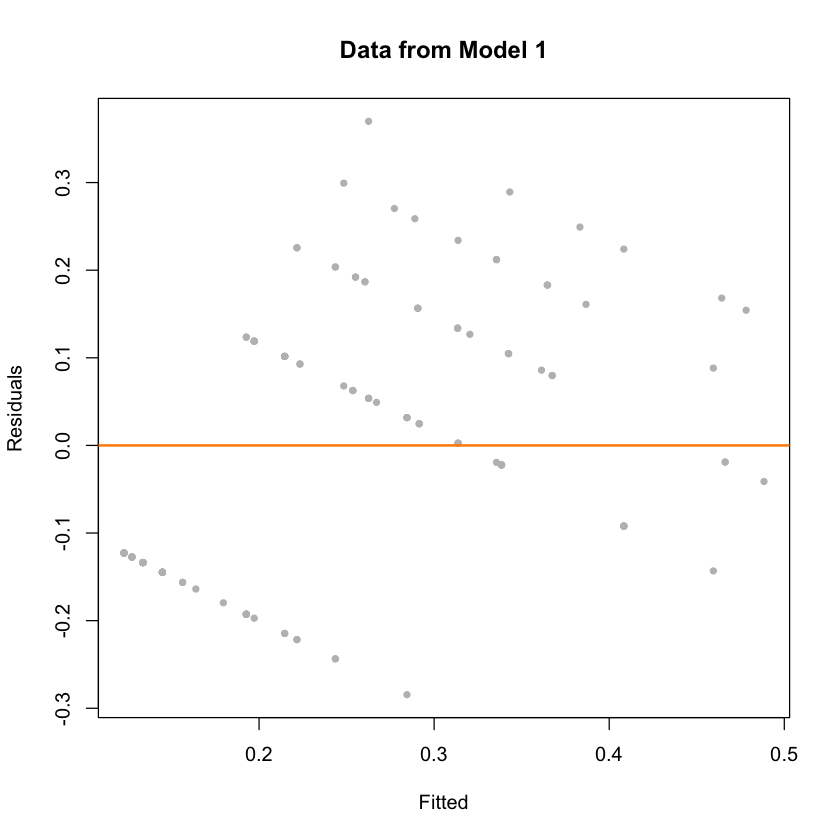

In [73]:
plot(fitted(md.affirms), resid(md.affirms), col = "grey", pch = 20,
     xlab = "Fitted", ylab = "Residuals", main = "Data from Model 1")
abline(h = 0, col = "darkorange", lwd = 2)

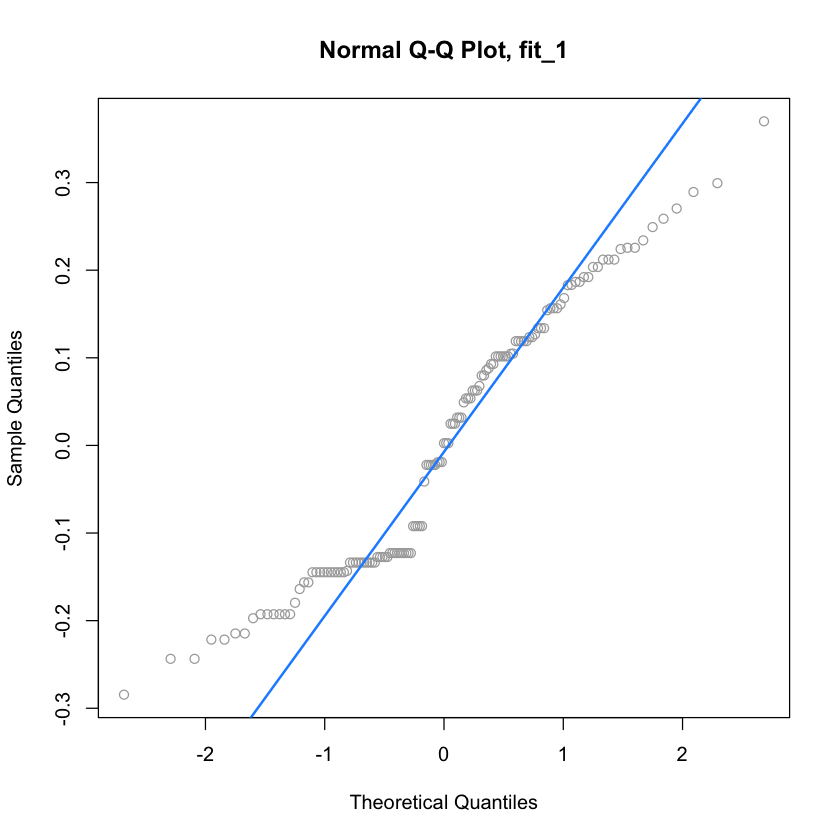

In [74]:
qqnorm(resid(md.affirms), main = "Normal Q-Q Plot, fit_1", col = "darkgrey")
qqline(resid(md.affirms), col = "dodgerblue", lwd = 2)

In [75]:
shapiro.test(resid(md.affirms))


	Shapiro-Wilk normality test

data:  resid(md.affirms)
W = 0.94382, p-value = 0.00002439


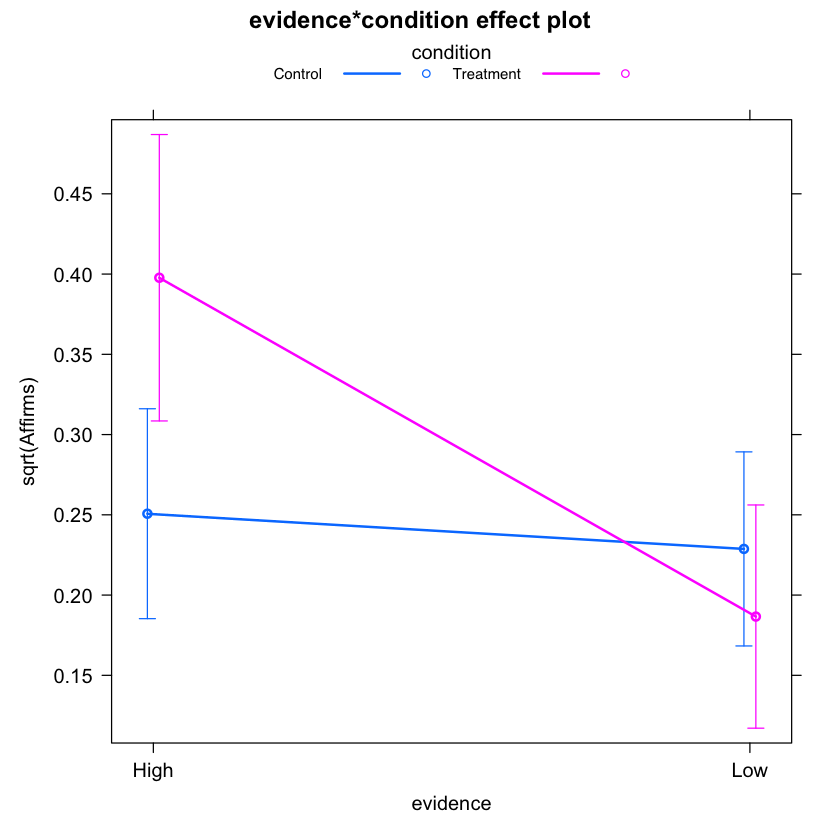

In [76]:
library(effects)
plot(allEffects(md.affirms), multiline=TRUE, ci.style="bars")